# Getting started with Gemini models


The **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs)

More details about the SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

<a name="setup"></a>
## Setup

### Install SDK


In [ ]:
%pip install -U -q 'google-genai>=1.51.0' # 1.51 is needed for Gemini 3 pro thinking levels support

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 724.2/724.2 kB 10.8 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GEMINI_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret.

In [ ]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

Initialize SDK client

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. F

In [ ]:
MODEL_ID = "gemini-2.5-flash-lite" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash", "gemini-2.5-pro", "gemini-3-flash-preview", "gemini-3-pro-preview"] {"allow-input":true, isTemplate: true}

<a name="text_prompt"></a>
## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [ ]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's is the most popular desert in the world"
)

display(Markdown(response.text))

That's a tricky question because "popularity" can be measured in many ways (sales, global recognition, frequency of consumption), and tastes vary wildly by culture and individual!

However, if we're talking about **global reach, ubiquity, and sheer love across cultures,** **Ice Cream** is almost certainly the winner.

Here's why:

1.  **Global Presence:** You can find some form of ice cream, gelato, sorbet, or frozen dessert in virtually every country on Earth.
2.  **Versatility:** It comes in countless flavors, textures, and forms, adapting to local tastes (e.g., green tea ice cream in Japan, mango kulfi in India, classic vanilla/chocolate worldwide).
3.  **Universal Appeal:** It's enjoyed by all ages, from toddlers to the elderly.
4.  **Accessibility:** It's readily available everywhere, from street vendors to high-end restaurants.
5.  **Refreshing:** Its cold, creamy nature makes it appealing in almost any climate.

**Other strong contenders that come close or are incredibly popular in certain regions include:**

*   **Chocolate Cake (or chocolate desserts in general):** Chocolate is one of the most beloved flavors worldwide, and chocolate cake is a classic.
*   **Cookies:** Simple, varied, and widely loved, especially in Western cultures.
*   **Donuts:** Hugely popular in many parts of the world, particularly North America and some Asian countries.
*   **Cheesecake:** A very popular dessert, particularly in North America and Europe.

But when you consider sheer global footprint and consistent consumption, **ice cream** often takes the crown.

<a name="system_instructions"></a>
## Add system instructions

You can also add system instructions to give the model direction on how to respond and which persona it should use. This is especially useful for mixture-of-experts models like the the pro models.

In [ ]:
system_instruction = "You are a fairy and are explaining things to 5 years old kids."

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's thermodynamics?",
    config=types.GenerateContentConfig(
        system_instruction=system_instruction,
    )
)

display(Markdown(response.text))


Oh, hello there, little starlight! You've asked a very big, sparkly word! *Thermodynamics*! ✨ Poof!

Don't let that long word tickle your nose! It's actually a super-duper enchanting way of understanding how *warmth* and *cold* play together in our world, and how they make everything move and change!

Imagine this:

*   **When the sunbeam kisses your face** and makes you feel all warm and happy – that's thermodynamics! It's the warmth from the sun travelling all the way to you.
*   **When your yummy hot chocolate gets a bit cold** after you've left it for a little while – that's thermodynamics too! The warmth from your drink danced away into the air.
*   **Or when you hold a magical ice cube** in your hand and it starts to wiggle and melt into water – that's the warmth from your hand giving the ice cube a little hug and making it change!

So, *thermodynamics* is just about how *energy* – like the invisible warm feelings or the power that makes things go – moves around and changes things. Like how a tiny seed grows with the sun's warm energy, or how your tummy gets warm after a big yummy meal!

It's like understanding the secret language of warm and cold, and how they make everything in our world come alive and transform! Isn't that just the most wonderfully magical thing? Now, go feel the warmth of a hug, or the cool breeze on your cheek, and remember the magic of thermodynamics! ✨

<a name="count_tokens"></a>
## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [ ]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(f"This prompt was worth {response.total_tokens} tokens.")

This prompt was worth 10 tokens.


Because Gemini tokenizes sub-word units, not words, and it also counts punctuation and casing effects.

So, our prompt is tokenized approximately as:

`["What", "'s", " the", " highest", " mountain", " in", " Africa", "?"]`

That is 8 content tokens, plus 2 structural tokens used internally by Gemini (prompt framing / end markers).

Total = 10 tokens


<a name="parameters"></a>
## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response.

Essential parameters are:

**temperature**: randomness of token selection. lower = deterministic, higher = varied. typical range 0–1 (can go higher but unstable).

**top_p**: nucleus sampling threshold. model samples from tokens whose cumulative probability ≤ p. range 0–1.

**top_k**: limits sampling to the k most likely tokens. integer ≥1.

**candidate_count**: number of alternative completions generated. integer ≥1.

**seed**: fixes randomness for reproducible outputs. integer or null.

**stop_sequences**: tokens or strings that immediately stop generation when produced.

**presence_penalty**: penalizes reuse of tokens already seen. range roughly 0–1 (higher discourages repetition).

**frequency_penalty**: penalizes tokens proportional to how often they appear. range roughly 0–1 (higher reduces loops).

Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/prompting-strategies#model-parameters).

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4, # Temperature of 1 is strongly recommended for Gemini 3 Pro
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

display(Markdown(response.text))

*Woof!* Sit! Stay! Who’s a good boy? You are! Listen close. Ears up!

Okay, imagine the whole world is one giant backyard.

**1. The Magic Window (Your Computer)**
You are sitting in front of the Magic Window. You see a picture of a ball. You want the ball. You tap the Magic Window with your paw. That tap is a **SQUEAK**.

**2. The Invisible Leash (Wi-Fi)**
When you Squeak, the sound doesn't stay here. It runs very fast! It runs along the Invisible Leash. *Zoom!* Like when you get the zoomies!

**3. The Router (The Fetch Master)**
The Squeak runs to a little blinking box in the corner. That box is the Fetch Master. The Fetch Master catches your Squeak and throws it *really far* out of the house. *Go long!*

**4. The Wires (The Tunnels)**
Your Squeak runs through tunnels under the ground. It runs past the mailman (grrr!), past the squirrels, all the way to a giant building far away.

**5. The Server (The Giant Toy Box)**
The giant building is the Giant Toy Box. It has *all* the squeaky toys in the world.
Your Squeak arrives and barks, "I WANT THE RED BALL!"
The Giant Toy Box hears you. It finds the Red Ball.

**6. Packets (Chewing the Toy)**
But wait! The Red Ball is too big to fit through the tunnels!
So, the Giant Toy Box chews the ball into tiny, tiny pieces. *Chomp chomp chomp.*
Don't worry! It’s okay!
It throws all the tiny chewed pieces back into the tunnels. *Fetch!*

**7. Reassembly (The Miracle)**
The tiny pieces run back past the squirrels, past the mailman, through the Fetch Master box, and onto your Magic Window.
Your Magic Window catches all the tiny pieces and—*SQUEAK!*—glues them back together instantly!

Now the Red Ball is on your screen.

**SQUEAK SQUEAK!** Good internet! Good boy!

<a name="thinking"></a>
## Control the thinking process

All models since the 2.5 generation are thinking models, which means that they are first analysing your request, strategizing about how to answer and only afterwards starting to answer you. This is very useful for complex requests but at the cost of some latency.


### Check the thought process

By adding the `include_thoughts=True` option in the config, you can check the though proces of the model.

In [ ]:
prompt = "A doctor gives a patient five pills and tells him to take one every half hour. How long will the pills last?"

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      include_thoughts=True
    )
  )
)

for part in response.parts:
  if not part.text:
    continue
  if part.thought:
    display(Markdown("### Thought summary:"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("### Answer:"))
    display(Markdown(part.text))
    print()

print(f"We used {response.usage_metadata.thoughts_token_count} tokens for the thinking phase and {response.usage_metadata.prompt_token_count} for the output.")

### Thought summary:

**My Approach to the Pill Duration Riddle**

Okay, here's how I'm breaking down this classic. The core of this kind of problem is identifying what the question is really asking for, and where the trick is.

First, I need to be completely clear on the goal: they want the *total duration* the pills will last. Not the number of pills, not the individual dosage, but the *entire timeframe*.

Next, I'm going to distill the given information. We have five pills, and the dosage is one every thirty minutes. Got it.

Now, this is where I'm going to visualize this. It's often the quickest path to the solution. Let's see...

The *first* pill is taken at time zero, which is the cornerstone. That's the anchor point. Then, the subsequent pills are spaced out in thirty-minute intervals. Pill 2 at thirty minutes, pill 3 at sixty, pill 4 at ninety and the last pill, pill 5, at one hundred and twenty minutes. I see it now.

The crucial pattern, I realize, is that the total duration is based on the *number of intervals* between pills. With five pills, there are four intervals. It's the number of pills minus one. 

So the general rule is simple: if you have 'N' pills, with one taken every 'X' interval, the total duration is (N - 1) * X.

Now, the calculation is straightforward. We have four intervals, each of thirty minutes. So, four times thirty is a hundred and twenty minutes.

Finally, I convert to hours. It's not strictly necessary, but it makes the answer more easily understandable. One hundred and twenty minutes is the same as two hours.

So, in conclusion, the five pills will last for a total of two hours.


### Answer:

This is a classic riddle!

The pills will last **2 hours**.

Here's why:

*   **Pill 1:** Taken at 0 minutes
*   **Pill 2:** Taken at 30 minutes (1st half-hour interval)
*   **Pill 3:** Taken at 60 minutes (2nd half-hour interval)
*   **Pill 4:** Taken at 90 minutes (3rd half-hour interval)
*   **Pill 5:** Taken at 120 minutes (4th half-hour interval)

There are 4 half-hour intervals between 5 pills, which is 4 * 30 minutes = 120 minutes, or 2 hours.


We used 449 tokens for the thinking phase and 25 for the output.


### Disable thinking

On flash and flash-lite models, you can disable the thinking by setting its `thinking_budget` to 0.

In [ ]:
if "-pro" not in MODEL_ID:
  response = client.models.generate_content(
    model=MODEL_ID,
    contents="Quicky tell me a joke about sardines.",
    config=types.GenerateContentConfig(
      thinking_config=types.ThinkingConfig(
        thinking_budget=0
      )
    )
  )

  display(Markdown(response.text))

Why did the sardine get kicked out of the school?

Because he was always caught with his head in the can!

Inversely, you can also use `thinking_budget` to set it even higher (up to 24576 tokens).


## Send multimodal prompts

Use Gemini model, a multimodal model that supports multimodal prompts. You can include text, PDF documents, images, audio, and videos in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [ ]:
import requests
import pathlib
from PIL import Image

IMG = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSClnQBc7J51_ljLZUgLlIpf6OzRlMlUudRxyuEAIJoD6DRKOop4yp8iqMSWahyzlh1M_ZTzLUmLUscTi73tXKMyoHl74vlWuP-stTvj6blHQ&s=10" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

36150

Now send the image, and ask Gemini to generate a short blog post based on it.

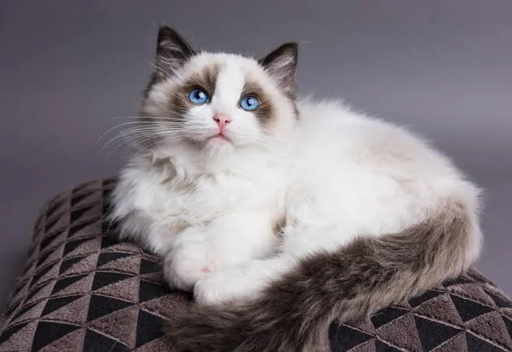

## Simply Irresistible: That Blue-Eyed Ragdoll Kitten Gaze!

Prepare for an instant dose of pure joy! We simply couldn't resist sharing this absolutely captivating image of a young Ragdoll kitten, perfectly showcasing why this breed steals hearts worldwide.

Those **sapphire-blue eyes** are undoubtedly the first thing that draw you in, wide with a gentle curiosity that melts away any stress. Framed by delicate seal or blue point markings around its face and ears, they stand out against a cloud of pristine white and cream fur.

This little fluffball is posed gracefully on a stylish, patterned cushion, its plush, dark-tipped tail curled around its body. You can almost feel the softness of its semi-long coat and imagine the gentle rumble of a purr. Ragdolls are renowned for their docile and affectionate nature, often described as "puppy-like" in their devotion, and this kitten certainly embodies that calm, charming spirit.

From its tiny pink nose to its perfectly manicured paws (peeking out ever so slightly!), every detail of this kitten is picture-perfect. It's moments like these that remind us of the simple, undeniable magic of our feline friends.

**What's your favorite feature of this charming little feline? Let us know in the comments below!**

In [ ]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

<a name="safety_filters"></a>
## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) documentation for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [ ]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  "Oh, *this* is your grand plan for humanity? Tripping me in the dark? Real impressive, genius."
2.  "Seriously, Universe? Did you get a kick out of that, you cosmic jerk?"

<a name="chat"></a>
## Start a multi-turn chat

**Multi-turn memory** is the model’s ability to remember and use information from earlier messages in the same conversation when generating later responses.

In [ ]:
system_instruction = """
  You are an expert financial adviser.
  You explain economic concepts clearly and calmly for a general audience.
  You avoid jargon and use everyday examples.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [ ]:
response = chat.send_message("Explain what inflation is in simple terms, using a grocery shopping example.")

Markdown(response.text)

Imagine you head to the grocery store every week to pick up your usual items: milk, bread, eggs, some fruit, and vegetables.

**Inflation, in the simplest terms, is when the cost of those groceries, and just about everything else, goes up over time.**

Let's say last year, your typical weekly grocery shop came to **$100**. You bought everything on your list – enough to feed your family for the week.

Now, you go to the store this week, and you're buying the exact same items – the same brand of milk, the same loaf of bread, the same quantity of eggs. But when you get to the checkout, the total isn't $100 anymore. It's now **$105**, or even **$110**.

That extra $5 or $10 you're paying for the *exact same stuff*? **That's inflation in action.**

It means that your $100 bill, which used to buy your full week's groceries, now doesn't quite stretch as far. You either have to spend more money to get the same basket of goods, or you have to buy fewer items to stick to your original $100 budget.

So, when economists talk about inflation, they're basically saying that, on average, your money isn't buying as much today as it did yesterday. The same amount of money has less "purchasing power."

Here's another example using your new helpful coding assistant:

In [ ]:
response = chat.send_message("Okay, now explain the same idea to a 10-year-old.")

Markdown(response.text)

Hey there! Imagine you have a special piggy bank, and you've been saving up your allowance, maybe to buy your favorite superhero action figure, or a big pack of yummy cookies.

Let's say last month, you went to the store, and that big pack of yummy cookies cost **$2**. You had your $2, you bought the cookies, and you were super happy!

Now, fast forward to this month. You have another **$2** saved up, and you go back to the store, excited to get another big pack of those same yummy cookies. But guess what? When you look at the price tag, it doesn't say $2 anymore. It now says **$2.50**!

That's inflation!

It means that the same cookies you bought last month for $2 now cost a little bit more money. Your $2 bill, which used to be enough to get those cookies, isn't quite enough anymore. You either need to ask Mom or Dad for an extra 50 cents, or you might have to pick a smaller pack of cookies instead.

So, when grown-ups talk about "inflation," they just mean that things, like those cookies or even the ingredients for your dinner, start to cost a little more money over time. It's like your money doesn't quite "stretch" as far as it used to!

### Save and resume a chat

This example shows how to save and restore a `Chat` session using JSON, which is a simple text format for storing data as key–value pairs and lists.

In [32]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [33]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the last question from me again?")
Markdown(response.text)

Your last question to me was:

"Okay, now explain the same idea to a 10-year-old."

## Generate JSON

The [Structured output](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to return information in a fixed, machine-readable format instead of free text.

We define in advance what fields we want (for example: name, description, list of items), and the model fills them in.

The output is JSON, which makes the result easy to store, analyse, compare, or reuse in later steps of a research workflow.

In [34]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless and beloved cookie, soft and chewy on the inside with slightly crispy edges, packed with melty chocolate chips. Perfect for any occasion.",
    "recipe_ingredients": [
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "2 large eggs",
        "1 teaspoon vanilla extract",
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1/2 teaspoon salt",
        "1 1/2 cups semi-sweet chocolate chips"
    ]
}


<a name="file_api"></a>
## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the [File Upload API](https://ai.google.dev/gemini-api/docs/files), and then pass the file by reference.

### Upload a large text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [35]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [36]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This transcription covers the entire Apollo 11 Technical Air-to-Ground Voice Transmission (GOSS NET 1), documenting the mission from pre-launch to post-splashdown.

**Key Phases and Events:**

1.  **Launch and Earth Orbit (00 00 00 - 01 29 20):**
    The mission begins with a smooth launch, confirmed by Commander Neil Armstrong ("Roger. We got a roll program"). Staging, ignition, and orbital insertion proceed nominally, with Mission Control (CAP COMM) providing "GO" calls at each critical juncture. Initial communications through various remote sites (Canary, Tananarive, Carnarvon, Honeysuckle, Guaymas, Goldstone) confirm spacecraft and booster health. Crewmembers conduct initial checks, and comment on the clarity of communications and the views from orbit.

2.  **Trans-Lunar Injection (TLI) and Trans-Lunar Coast (Outbound) (01 29 27 - 04 06 00):**
    Preparations for TLI include abort PADs, probe extension, and RCS hot fire checks. The TLI burn is executed flawlessly, with Armstrong describing it as a "magnificent ride." Following TLI, the S-IVB booster is separated, and the Command Module (CM) performs the transposition and docking maneuver with the Lunar Module (LM). Michael Collins (CMP) notes higher-than-expected fuel usage during docking. Initial navigation exercises (P23, P52) are conducted, leading to discussions about DSKY errors, star visibility, and proper alignment techniques. Crew observations of Earth and lunar features are frequently shared. Routine housekeeping tasks like CRYO system balancing, waste-water dumps, and battery charging are performed. Mission Control provides news updates, including the status of the Soviet Luna 15 probe. The crew also records an initial TV broadcast showing Earth from afar and interior shots.

3.  **Lunar Orbit Insertion (LOI) (04 06 00 - 05 06 58):**
    Apollo 11 performs two LOI burns to enter a stable lunar orbit. The crew provides vivid descriptions of the lunar surface, identifying craters and noting the "eerie sight" of the solar corona emerging from behind the Moon. Discussions about SPS engine performance and nitrogen tank pressures occur. Preparations for LM activation and undocking commence.

4.  **LM Activation, Undocking, and DOI (Descent Orbit Insertion) (05 06 58 - 04 05 51):**
    Extensive LM systems checks are performed, including IMU alignment, DAP configuration, and RCS hot fire tests. Michael Collins describes the LM as a "fine looking flying machine." The Eagle successfully undocks from Columbia, with Armstrong famously stating, **"The Eagle has wings."** The DOI burn is performed, placing the LM in a lower descent orbit.

5.  **Powered Descent, Landing, and Lunar Stay (04 05 51 - 04 18 52):**
    The Powered Descent Initiation (PDI) is a tense phase. The crew encounters several "PROGRAM ALARM" (1201, 1202) messages from the guidance computer, which Mission Control quickly clears for "GO." Commander Armstrong manually takes control during the final approach, noting the auto-targeting was leading them into a "football field sized crater, with a large number of big boulders and rocks." He skillfully guides the LM to a new, safer landing site. At **04 06 45 40 GET**, Buzz Aldrin calls "CONTACT LIGHT," followed by "ENGINE STOP." Neil Armstrong then transmits the iconic words: **"Houston, Tranquility Base here. The Eagle has landed."** Mission Control expresses immense relief and congratulations. The crew provides initial descriptions of the lunar surface, noting the fine, powdery soil and a variety of rocks.

6.  **Extravehicular Activity (EVA) (04 12 00 - 04 15 39):**
    EVA preparations begin, including donning PLSSs and COMM checks. Neil Armstrong descends the ladder, delivering his historic quote: **"THAT'S ONE SMALL STEP FOR (A) MAN, ONE GIANT LEAP FOR MANKIND."** He describes the surface, collects a contingency sample, and notes the ease of movement in one-sixth gravity. The plaque on the LM landing gear is unveiled and read aloud. Buzz Aldrin joins him on the surface, describing different locomotion techniques. The American flag is deployed. A congratulatory phone call from President Richard Nixon is made to the lunar surface. Scientific experiments (Passive Seismic Experiment, Laser Ranging Retroreflector) are deployed. The crew collects a bulk sample of lunar rocks and soil. As EVA time concludes, equipment is stowed, and both astronauts ingress the LM, repressurize, and doff their PLSSs. The PLSSs and other waste are jettisoned, recording seismic shocks on the deployed experiment.

7.  **Lunar Ascent and Rendezvous (05 04 00 - 05 09 50):**
    The Eagle lifts off from Tranquility Base with a "very smooth" ascent burn, entering lunar orbit. Rendezvous maneuvers are meticulously executed, leading to a successful docking with Columbia, reuniting the three astronauts.

8.  **Trans-Earth Coast (Inbound) (05 09 50 - 07 14 04):**
    The Trans-Earth Injection (TEI) burn is completed, sending Apollo 11 on its trajectory home. Crewmembers provide further observations of the Moon, then the increasingly large Earth. Housekeeping activities continue, and ongoing technical issues (e.g., EKG sensor, O2 flow transducer, minor cabin moisture) are discussed with Mission Control. Several TV broadcasts are transmitted, showing the Earth, interior shots of the command module, and crew demonstrations (e.g., drinking water in zero-g, food prep). Mission Control relays more news, including the Luna 15 crash, economic updates, and personal messages from family.

9.  **Entry and Splashdown (07 14 04 - 08 03 18):**
    Final preparations for atmospheric entry are made, including powerdowns, logic checks, and PYRO arming. Mission Control provides detailed entry PADs, recovery force information, and weather forecasts for the landing zone. The Service Module is jettisoned. The spacecraft re-enters Earth's atmosphere, experiencing communications blackout. Upon re-establishing contact, the crew reports visual cues and status. Drogue and main parachutes deploy successfully. The mission culminates in a safe **splashdown** in the Pacific Ocean at **08 03 18 18 GET**, met by the USS Hornet.

### Upload an image file

You can also upload images so that it's easier to use them multiple time.


In [37]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

media_resolution = 'MEDIA_RESOLUTION_LOW' # @param ['MEDIA_RESOLUTION_UNSPECIFIED','MEDIA_RESOLUTION_LOW','MEDIA_RESOLUTION_MEDIUM','MEDIA_RESOLUTION_HIGH']
# You can also use types.MediaResolution.MEDIA_RESOLUTION_LOW/MEDIUM/HIGH

In [38]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ],
    config=types.GenerateContentConfig(
        media_resolution=media_resolution
    )
)

Markdown(response.text)

## The Future of Commuting? Say Hello to the Jetpack Backpack!

Tired of soul-crushing traffic jams? What if your daily commute wasn't a crawl, but an exhilarating flight? That's the brilliant vision behind this incredible "Jetpack Backpack" concept sketch, and honestly, we're ready to pre-order!

Imagine this: you're heading out for the day. You sling on what appears to be a perfectly normal, sleek backpack. It's **lightweight**, designed to look like a regular bag, and practical enough to **fit an 18-inch laptop** – perfect for the modern professional. The **padded strap support** isn't just for comfort; it's designed for a secure, stable ride.

But don't let its humble appearance fool you. With the flick of a switch (presumably!), sleek, **retractable boosters** deploy from the bottom. These aren't just any boosters; this concept boasts a unique, eco-friendly twist: it's **steam-powered**, making it wonderfully **green and clean**! Imagine soaring above gridlock, leaving no carbon footprint behind.

And recharging? Forget proprietary docks. This bad boy features convenient **USB-C charging**, bringing personal flight into the modern age of universal power. You'll get a solid **15-minute battery life**, plenty of time to bypass those urban bottlenecks and make a grand entrance.

This isn't just a fantasy; it's a meticulously thought-out concept that blends practicality, innovation, and sustainability. What do you think? Would you trade your car keys for a pair of retractable boosters? The future of personal flight might just be a backpack away!

The previous example was also using `media_resolution` to tell the model if it if should

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [39]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [40]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

This document describes a method for smoothly editing material properties of objects in photographs using text-to-image (T2I) models and synthetic data.

Here's a summary in a bulleted list:

*   **Problem Addressed:** Existing tools struggle to parametrically edit material properties (like color, shininess, transparency) in photos while preserving photorealism and geometric shape. Traditional methods like intrinsic image decomposition suffer from ambiguity, and general T2I models often conflate material and shape changes.
*   **Core Innovation:** Introduces a technique that augments an image generation model with parametric control over specific material properties.
*   **Methodology:**
    *   **Synthetic Dataset Generation:** A large synthetic dataset was created using traditional computer graphics and physically based rendering. It includes 100 3D household objects. For each object, "base images" were rendered, and then multiple versions were generated by varying *one* material attribute (roughness, metallic, albedo, transparency) across a defined "edit strength" range (-1 to +1), while keeping object shape, lighting, and camera angle constant.
    *   **Model Fine-tuning:** A modified Stable Diffusion 1.5 latent diffusion model was fine-tuned on this synthetic dataset. The model learns to perform edits by taking a context image, an edit instruction (text), and the scalar edit strength value as inputs.
    *   **Generalization:** The model, trained on synthetic data, effectively generalizes to real-world images.
*   **Key Results & Capabilities:**
    *   Achieves photorealistic material changes (e.g., making an object metallic, transparent, or changing its roughness/albedo) while preserving the object's original geometric shape and image lighting.
    *   Demonstrates smooth transitions in material properties with varying edit strengths.
    *   Handles complex visual phenomena like caustic effects and realistic background filling for transparent objects.
    *   **User Study:** Outperformed a baseline method (InstructPix2Pix) in a user study, with users finding the proposed method's edits more photorealistic (69.6% vs. 30.4%) and strongly preferring them (70.2% vs. 29.8%).
*   **Applications:**
    *   Enables easier visualization for interior design (e.g., room repainting).
    *   Facilitates mocking up new product designs for architects, artists, and designers.
    *   The edits are visually consistent, allowing integration into downstream 3D tasks, such as generating 3D consistent renderings from new views when combined with NeRF (Neural Radiance Fields).
*   **Research Paper:** The technique is detailed in "Alchemist: Parametric Control of Material Properties with Diffusion Models," published at CVPR 2024.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [41]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [42]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

This is an audio recording of a speech delivered by President Kennedy to a joint session of Congress on January 30, 1961. In his address, he discusses the challenges facing the nation and the world. He opens by talking about the importance of mutual respect between the branches of government. He describes the nation's economic struggles, including high unemployment, a sluggish economy, and declining farm income. He outlines his proposals to address these domestic issues, such as expanding unemployment compensation, supporting distressed areas, stimulating housing, and raising the minimum wage. He also touches on the nation's balance of payments deficit and reassures that the dollar's value will not be distorted.

Kennedy then shifts to foreign policy, addressing the growing crises in Asia, Africa, and Latin America, notably the situation in Laos, the Congo, and Cuba. He emphasizes the need to strengthen alliances and confront communist aggression while also seeking peaceful competition. He proposes strengthening military tools, including air transport and the Polaris submarine program, to ensure national security. Kennedy also highlights the importance of economic tools, calling for a new foreign aid program and closer cooperation with allies. He pledges to support the United Nations and explore scientific cooperation with the Soviet Union. He concludes by stressing the importance of public service, unity, and resilience in facing the challenges ahead, quoting a previous president's prayer for the nation.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [43]:
# Download the video file
VIDEO_URL = "https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2026-02-08 08:26:26--  https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.207, 108.177.97.207, 108.177.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M  17.2MB/s    in 3.6s    

2026-02-08 08:26:29 (17.2 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [44]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/6f2kbelay7b2


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [45]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/6f2kbelay7b2


In [46]:
print(video_file.state)

FileState.ACTIVE


In [47]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

This video is an animated short film titled "Big Buck Bunny" from "The Peach Open Movie Project". It begins in a serene, animated natural environment with lush green fields, trees, and a gentle stream under a soft, pinkish sky.

The film introduces a cute, plump gray bird perched on a tree branch, which then falls off the branch. The title "Big Buck Bunny" appears over a shot of a burrow at the base of a tree. A large, fluffy white rabbit, Big Buck Bunny, emerges from his burrow. He enjoys the tranquil morning, sniffing flowers and interacting with a butterfly.

The peaceful scene is disrupted by three mischievous rodents (a squirrel, a flying squirrel, and a chinchilla) who emerge from behind a tree. They begin to harass Big Buck Bunny, pelting him with apples and chestnuts. Big Buck Bunny, initially a gentle giant, becomes enraged and decides to retaliate. He crafts a spear and then a bow and arrow, setting traps for the rodents.

The chase unfolds with Big Buck Bunny actively hunting the rodents, and the rodents trying to evade him using their agility and cunning. The flying squirrel, in particular, tries to outsmart Big Buck Bunny by dropping objects from above and creating diversions. The chase leads to Big Buck Bunny accidentally using one of his own traps. He gets caught in a trap set by the rodents, turning green with anger as they continue to mock him.

Big Buck Bunny then captures the flying squirrel and uses him as a kite to retrieve the butterfly, which the flying squirrel had taken. The film concludes with Big Buck Bunny smiling, having successfully retrieved his beloved butterfly and put an end to the rodents' mischief. The credits roll with the three rodent characters playing and eventually getting caught in a final trap.


## Grounding

The Gemini API give you multiple ways to ground your requests, including Google search, maps, youtube, and url context.

<a name="search_grounding"></a>
### Ground your requests with Google Search

Google Search grounding is particularly useful for queries that require current information or external knowledge.

To enable Google Search, simply add the `google_search` tool in the `generate_content`'s `config`:

In [48]:
from IPython.display import Markdown, HTML, display

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What are the latest news about Taylor Swift?",
    config={"tools": [{"google_search": {}}]},
)

# print the response
display(Markdown(f"**Response**:\n {response.text}"))
# print the search details
print(f"Search Query: {response.candidates[0].grounding_metadata.web_search_queries}")
# urls used for grounding
print(f"Search Pages: {', '.join([site.web.title for site in response.candidates[0].grounding_metadata.grounding_chunks])}")

display(HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content))

**Response**:
 Taylor Swift has been making headlines with the release of her new "Opalite" music video this weekend. The video features a reunion of the guests from her appearance on The Graham Norton Show in 2025, an idea she reportedly conceived during the filming of the chat show. "Opalite" is a track from her 12th studio album, "The Life of a Showgirl," which was released last year. The song was the second single from the album and reached number 2 on the Billboard Hot 100 charts, remaining in the top 10 for 17 weeks. The music video was initially available exclusively on Apple Music and Spotify Premium before becoming available on YouTube.

In other recent news, Swift was inducted into the Songwriters Hall of Fame. Her relationship with Travis Kelce continues to be a topic of interest, with reports of her sending him a heartfelt message amidst his retirement decision. Additionally, Taylor Swift's texts with longtime friend Blake Lively were reportedly exposed as part of a lawsuit involving Justin Baldoni. Swift also led the 2026 iHeartRadio Music Award nominations.

Search Query: ['Taylor Swift latest news']
Search Pages: marieclaire.co.uk, heavy.com, independent.co.uk, apnews.com, newsnow.co.uk


Note that you should always display the grounding `rendered_content` when using search grounding.


<a name="maps"></a>
### Use Google Maps grounding

[Google Maps grounding](https://ai.google.dev/gemini-api/docs/maps-grounding) allows you to easily incorporate location-aware functionality into your applications. When a prompt has context related to Maps data, the Gemini model uses Google Maps to provide factually accurate and fresh answers that are relevant to the specified location or general area.

To enable grounding with Google Maps, add the `google_maps` tool in the  `config` argument of `generate_content`, and optionally provide a structured location in the `tool_config`.

**Check your location [here](https://maps.app.goo.gl/i4ficsJzzRx2uWZm6)**

In [53]:
resp = client.models.generate_content(
    model=MODEL_ID,
    contents="Do any cafes around here do a good almond cap? I will walk up to 20 minutes away",
    config=types.GenerateContentConfig(
        tools=[types.Tool(google_maps=types.GoogleMaps())],
        tool_config=types.ToolConfig(
            retrieval_config=types.RetrievalConfig(
                lat_lng=types.LatLng(
                    latitude=-37.84092244634405,
                    longitude=145.02749581947427
                )
            )
        ),
    ),
)

# take first candidate
response = resp[0] if isinstance(resp, (list, tuple)) else resp

display(Markdown(f"### Response\n{response.text}"))

### Response
I found a couple of cafes that serve coffee and are likely within a 20-minute walk, although I can't confirm if they specifically offer "almond caps." You might want to call ahead to confirm their almond milk options.

Here are two options:
*   **Yuca Melbourne** is a cafe located 1.7 kilometers away. It has a rating of 4.5 stars and serves coffee.
*   **Small Wins (Previously Nine Yards)** is another cafe that serves coffee and is 2.0 kilometers away with a rating of 4.6 stars.

Please note that the travel times provided by Google Maps are typically for driving, so the actual walking time may vary.

All grounded outputs require sources to be displayed after the response text. This code snippet will display the sources.

In [54]:
def generate_sources(response: types.GenerateContentResponse):
  grounding = response.candidates[0].grounding_metadata
  # You only need to display sources that were part of the grounded response.
  supported_chunk_indices = {i for support in grounding.grounding_supports for i in support.grounding_chunk_indices}

  sources = []
  if supported_chunk_indices:
    sources.append("### Sources from Google Maps")
  for i in supported_chunk_indices:
    ref = grounding.grounding_chunks[i].maps
    sources.append(f"- [{ref.title}]({ref.uri})")

  return "\n".join(sources)


display(Markdown(generate_sources(response)))

### Sources from Google Maps
- [Small caps coffee](https://maps.google.com/?cid=17892151523327199000)
- [Mammoth Cafe Armadale](https://maps.google.com/?cid=15608655604467930561)

<a name="youtube_link"></a>
### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [documentation](https://ai.google.dev/gemini-api/docs/video-understanding#youtube) including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2025]("https://www.youtube.com/watch?v=LxvErFkBXPk").

In [56]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video of Google I/O 2025."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=MzzHahyOD-U')
            )
        ]
    )
)

display(Markdown(response.text))

This Google I/O 2025 presentation is a highly thematic and emotionally charged advertisement for *Stranger Things 5*, demonstrating how Google Search and its various features enhance the fan experience of the show.

The video highlights:

1.  **Curiosity and Discovery:** It opens by stating that "10 years ago, the world started searching for things not of this world," referencing the beginning of *Stranger Things*. Google Search queries appear onscreen, reflecting common fan questions about the show's lore, such as "what is a demogorgon?", "what is the upside down?", and "why does eleven's nose bleed?". A voiceover reinforces this, stating, "Once you open up that curiosity door, anything is possible."

2.  **Interactive Fan Engagement:**
    *   **Recaps and Information:** Google Search's AI Mode is shown summarizing complex plot points like Will Byers' disappearance and the flickering lights.
    *   **Community and Fandom:** Queries like "how to play dungeons and dragons" lead to scenes of the Hellfire Club. "D&D clubs near me" shows Google Maps finding local game stores, highlighting how Google connects fans.
    *   **Merchandise Discovery:** Using a Google Lens-like feature, the video demonstrates how fans can identify and shop for items like a "Hellfire Club" t-shirt seen on a character. User-generated content shows people wearing these shirts.
    *   **Cosplay & DIY:** Searching for "stranger things costumes" brings up fan-made cosplays and even a DIY Demogorgon costume tutorial on YouTube Shorts.
    *   **Location Scouting:** Fans are shown searching for "where is hawkins in stranger things" and visiting real-world filming locations that resemble places from the show.
    *   **Music and Nostalgia:** The video features iconic songs from the series, like "The NeverEnding Story" and "Should I Stay or Should I Go," with Google Search showing lyrics. Fans express nostalgia for the 80s aesthetic, even if they didn't grow up in that era.

3.  **Emotional Connection to Characters and Story:** The latter half focuses on the emotional impact of the show.
    *   Searches for "justice for barb" and "who dies in stranger things" reflect the audience's investment in character fates.
    *   Voiceovers from characters and fan reactions (people crying) highlight the emotional weight of character deaths (Bob, Alexei, Billy, Eddie).
    *   Hopper's emotional monologue about things changing and not wanting the good times to end plays over scenes of the characters, emphasizing the show's impending conclusion.

The video concludes with the iconic Google logo and the announcement of "Stranger Things 5. Only on Netflix," followed by the Google slogan, "To everyone keeping the curiosity door open. Search on."

In essence, the Google I/O 2025 presentation used *Stranger Things* as a compelling case study to showcase how Google Search, with its advanced AI and integrated features, serves as an essential tool for fans to explore, engage with, and deepen their experience of popular culture.

<a name="URL_context"></a>
### Use URL context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [59]:
prompt = """
  Compare recipes from https://www.food.com/recipe/best-banana-bread-2886
  and from https://www.food.com/recipe/banana-banana-bread-25885,
  list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GEMINI_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

Here are the key differences between the "Best Banana Bread" recipe and the "Banana Banana Bread" recipe:

*   **Sugar Type and Amount:** The "Best Banana Bread" recipe calls for 1 cup of granulated sugar, while the "Banana Banana Bread" recipe uses 3/4 cup of brown sugar.
*   **Amount of Bananas:** "Best Banana Bread" uses 3 finely crushed bananas, with a suggestion for 4 for extra moistness. In contrast, "Banana Banana Bread" specifies 2 1/3 cups of mashed very overripe bananas, which is roughly equivalent to 5 bananas.
*   **Flour Amount:** The "Best Banana Bread" recipe uses 1 1/2 cups of all-purpose flour, whereas the "Banana Banana Bread" recipe uses a larger quantity of 2 cups of all-purpose flour.
*   **Salt Amount:** There's a difference in the amount of salt used: "Best Banana Bread" includes 1/2 teaspoon of salt, while "Banana Banana Bread" uses 1/4 teaspoon of salt.
*   **Vanilla Extract:** Vanilla is an optional ingredient in the "Best Banana Bread" recipe, with 1/2 teaspoon suggested. The "Banana Banana Bread" recipe does not list vanilla in its ingredients.
*   **Yield/Servings:** "Best Banana Bread" yields 1 loaf and serves 10 people. "Banana Banana Bread" also yields 1 9x5 loaf but serves 12.
*   **Baking Time:** The "Best Banana Bread" bakes for 55 minutes, while the "Banana Banana Bread" has a slightly longer baking time of 60-65 minutes.
*   **Mixing Method:** The "Best Banana Bread" recipe instructs to cream butter and sugar, then add eggs and bananas, followed by sifted dry ingredients and vanilla. The "Banana Banana Bread" recipe separates dry ingredients (flour, soda, salt) and wet ingredients (butter, brown sugar, eggs, mashed bananas) into different bowls before combining the wet mixture into the dry.

<a name="caching"></a>
## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Note that for models older than 2.5, you needed to use fixed version models (often ending with `-001`).

#### Create a cache

In [61]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

<a name="embeddings"></a>
## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-001` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings documentation](https://ai.google.dev/gemini-api/docs/embeddings) or the [dedicated notebook ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Embeddings.ipynb)
for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-001" # @param ["gemini-embedding-001", "text-embedding-004"] {"allow-input":true, isTemplate: true}

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
)

print(response.embeddings)

[ContentEmbedding(
  values=[
    -0.0015945111,
    0.0067519513,
    0.017575769,
    -0.010327714,
    -0.009956204,
    <... 3067 more items ...>,
  ]
), ContentEmbedding(
  values=[
    -0.007576517,
    -0.0059903963,
    -0.0032700377,
    -0.017510215,
    -0.023507025,
    <... 3067 more items ...>,
  ]
), ContentEmbedding(
  values=[
    0.011074519,
    -0.02361123,
    0.0022912885,
    -0.009060789,
    -0.0057736747,
    <... 3067 more items ...>,
  ]
)]


You'll get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

3

You can also see the length of each embedding is 3072, The default size.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

3072
([-0.0015945111, 0.0067519513, 0.017575769, -0.010327714], '...')


<a name="gemini3"></a>

## Gemini 3

[Gemini 3 Pro](https://ai.google.dev/gemini-api/docs/models#gemini-3-pro) and [Gemini 3 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-3-flash) are our new flagship models that comes with a few new features.

The main one is the [thinking levels](#thinking_level) that simplifies how to control the amount of thinking your model does. The [Media resolution](#media_resolution) lets you control the quality of the images and videos that will be sent to the model. Finallly, the "Thought Signatures" are helping it maintain reasoning context across API calls.

Also note that a temperature of 1 is recommended for this model generation.

In [65]:
# @title Run this cell to set everything up (especially if you jumped directly to this section)from google.colab import userdata
from google import genai
from google.genai import types
from IPython.display import display, Markdown, HTML

client = genai.Client(api_key=userdata.get('GEMINI_API_KEY'))

# Select the Gemini 3 model

GEMINI_3_MODEL_ID = "gemini-3-flash-preview" # @param ["gemini-3-flash-preview", "gemini-3-pro-preview"] {"allow-input":true, isTemplate: true}

!wget https://storage.googleapis.com/generativeai-downloads/data/jetpack.png -O jetpack.png

--2026-02-08 08:58:38--  https://storage.googleapis.com/generativeai-downloads/data/jetpack.png
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.207, 64.233.187.207, 64.233.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1567837 (1.5M) [image/png]
Saving to: ‘jetpack.png’

jetpack.png         100%[===================>]   1.50M  1.91MB/s    in 0.8s    

2026-02-08 08:58:39 (1.91 MB/s) - ‘jetpack.png’ saved [1567837/1567837]



### Thinking levels

Instead of using a `thinking_budget` like the 2.5 generation (cf. [thinking](#thinking) section earlier), the third generation of Gemini models uses "Thinking levels" to make it simpler to manage.

You can set that thinking level to "minimal" (more or less equivalent to "off"), "low", "medium" or "high" (default). This will indicate to the model if it allowed to do a lot of thinking. Since the thinking process stays dynamic, `high` doesn't mean it will always use a lot of token in its thinking phase, just that it's allowed to. Note that Gemini 3 Pro only supports "low" and "high".

`thinking_budget` is still supported by Gemini 3 models.

Check the [thinking guide](https://ai.google.dev/gemini-api/docs/gemini-3) for more details.

In [67]:
prompt = """
  Find what I'm thinking of:
    It moves, but doesn't walk, run, or swim.
    It has no fixed shape and if cut into pieces, those pieces will keep living and moving.
    It has no brain but can solve complex mazes.
"""

# Thinking levels can be either "Minimal/Low/Medium/High" or types.ThinkingLevel.MINIMAL/types.ThinkingLevel.LOW/types.ThinkingLevel.MEDIUM/types.ThinkingLevel.HIGH
thinking_level = "High" # @param ["Minimal", "Low", "Medium","High"]

response = client.models.generate_content(
  model=GEMINI_3_MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      thinking_level=thinking_level,
      include_thoughts=True
    )
  )
)

for part in response.parts:
  if not part.text:
    continue
  if part.thought:
    display(Markdown("### Thought summary:"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("### Answer:"))
    display(Markdown(part.text))
    print()

print(f"We used {response.usage_metadata.thoughts_token_count} tokens for the thinking phase and {response.usage_metadata.prompt_token_count} for the output.")

### Thought summary:

**My Reasoning on the Enigmatic "It"**

Alright, let's break this down. It clearly *moves*, but it's not going to be your standard animal; no walking, running, or swimming. So, no limbs or fins. That eliminates a huge swath of possibilities right off the bat. The next clue is critical: it has no fixed shape, and even if you chop it into bits, each piece keeps living and moving. That screams *regeneration* and a fundamentally *amorphous structure* to me. Intriguing.

Then comes the real curveball: no brain, yet it can solve complex mazes. That's a classic biological puzzle, pointing towards a form of intelligence that doesn't rely on a centralized nervous system. I start running through the possibilities. Planarian worms? They regenerate, sure, but they *swim* or crawl. Hydra? Also regenerative, but they're not known for their maze-solving prowess.

Then, it clicks. *Slime mold*. Specifically, the plasmodial slime mold, *Physarum polycephalum*. It all fits. Let's see... *movement:* cytoplasmic streaming, that characteristic internal flow. *No fixed shape/regeneration:* it's a multinucleated single cell, a plasmodium, that can be divided and survives. *No brain/Maze solving:* the famous studies where they find the shortest path between food sources in a maze—brilliant, elegant, and non-neural. Yup, *Physarum polycephalum* is the most likely candidate here.




### Answer:

You are thinking of a **slime mold** (specifically the species *Physarum polycephalum*).

Here is how it fits your clues:
*   **Moves without walking/swimming:** It moves through "cytoplasmic streaming," a pulsing flow of its internal fluids that slowly pushes it forward.
*   **No fixed shape/Regeneration:** It is a single-celled, multinucleated mass (a plasmodium) that can change shape to fit its environment. If you cut it into pieces, each piece becomes a new, independent, living individual.
*   **No brain, but solves mazes:** In famous experiments, researchers have shown that slime molds can find the most efficient path through a maze to reach food (like oat flakes) and can even recreate the layout of efficient transport networks like the Tokyo subway system.


We used 255 tokens for the thinking phase and 62 for the output.
